## INICIO LIMPIEZA DE DATOS Y NORMALIZACIÓN DE DATAFRAME

In [1]:
# Importar todas las librerías necesarias para el análisis y limpieza de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from unidecode import unidecode
import warnings

In [2]:
# Ignorar warnings para que no se muestren en la consola
warnings.filterwarnings('ignore')

In [3]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('datasets/df_tecnical_test.csv')

# Mostrar los tipos de datos de cada columna
print(df.dtypes)

date              object
url               object
query             object
country           object
search_type       object
device            object
is_tpf_faq          bool
impressions        int64
clicks             int64
ctr              float64
avg_position     float64
brand_status      object
paginas_areas     object
categorias        object
dtype: object


In [4]:
print(f'Total de filas: {df.shape[0]}')
print(f'Total de columnas: {df.shape[1]}')

Total de filas: 2388470
Total de columnas: 14


In [5]:
# Configurar pandas para mostrar bien las columnas
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_columns', None)

# Imprimir los primeros 10 valores del dataframe
print(df.head(10))

         date                  url                query country search_type  \
0  2024-03-11  https://adipa.cl...  terminos de psiq...     arg         WEB   
1  2024-03-11  https://adipa.cl...  autolesiones en ...     arg         WEB   
2  2024-03-11  https://adipa.cl...  coeficiente inte...     bgd         WEB   
3  2024-03-11  https://adipa.cl...                adips     chl         WEB   
4  2024-03-11  https://adipa.cl...         adipa ados 2     chl         WEB   
5  2024-03-11  https://adipa.cl...  psicologo online...     chl         WEB   
6  2024-03-11  https://adipa.cl...  curso de primero...     chl         WEB   
7  2024-03-11  https://adipa.cl...  cursos gratuitos...     chl         WEB   
8  2024-03-11  https://adipa.cl...  diplomado en psi...     chl         WEB   
9  2024-03-11  https://adipa.cl...  aprendizaje y co...     chl       IMAGE   

    device  is_tpf_faq  impressions  clicks  ctr  avg_position brand_status  \
0  DESKTOP       False            1       0  0.0   

In [6]:
# Imprimir la cantidad de valores nulos por cada columna
print(df.isnull().sum())

date              0
url              32
query            62
country          32
search_type       0
device           60
is_tpf_faq        0
impressions       0
clicks            0
ctr               0
avg_position     62
brand_status      0
paginas_areas     0
categorias        0
dtype: int64


In [7]:
# Imprimir las filas que contienen valores nulos
print(df[df.isnull().any(axis=1)])

               date                  url query country  search_type  device  \
34942    2024-03-10  https://adipa.cl...   NaN     chl     DISCOVER     NaN   
34982    2024-03-09  https://adipa.cl...   NaN     col     DISCOVER     NaN   
64954    2024-03-11  https://adipa.cl...   NaN     chl     DISCOVER     NaN   
144604   2024-03-10  https://adipa.cl...   NaN     col     DISCOVER     NaN   
155266   2024-04-12  https://adipa.cl...   NaN     chl     DISCOVER     NaN   
...             ...                  ...   ...     ...          ...     ...   
2221842  2024-03-16                  NaN   NaN     NaN     DISCOVER     NaN   
2308906  2024-05-15  https://adipa.cl...   NaN     chl  GOOGLE_NEWS  MOBILE   
2346312  2024-05-15  https://adipa.cl...   NaN     chl  GOOGLE_NEWS  MOBILE   
2346781  2024-05-13                  NaN   NaN     NaN     DISCOVER     NaN   
2383158  2024-03-20                  NaN   NaN     NaN     DISCOVER     NaN   

         is_tpf_faq  impressions  clicks       ctr 

In [8]:
# Eliminar filas que contienen valores nulos
df_without_nulls = df.dropna()

# Verificar que se eliminaron los nulos
print(df_without_nulls.isnull().sum())

date             0
url              0
query            0
country          0
search_type      0
device           0
is_tpf_faq       0
impressions      0
clicks           0
ctr              0
avg_position     0
brand_status     0
paginas_areas    0
categorias       0
dtype: int64


In [9]:
print(f'Total de filas: {df_without_nulls.shape[0]}')
print(f'Total de columnas: {df_without_nulls.shape[1]}')

Total de filas: 2388408
Total de columnas: 14


In [10]:
#Pasar la columna date a tipo datetime
df_without_nulls = df_without_nulls.copy()
df_without_nulls['date'] = pd.to_datetime(df_without_nulls['date'], errors='coerce')

In [11]:
# Uso de memoria antes de convertir las columnas
mem_before = df_without_nulls.memory_usage(deep=True).sum()

# Convertir las columnas categóricas a tipo 'category'
df_without_nulls['country'] = df_without_nulls['country'].astype('category')
df_without_nulls['search_type'] = df_without_nulls['search_type'].astype('category')
df_without_nulls['device'] = df_without_nulls['device'].astype('category')
df_without_nulls['brand_status'] = df_without_nulls['brand_status'].astype('category')
df_without_nulls['paginas_areas'] = df_without_nulls['paginas_areas'].astype('category')
df_without_nulls['categorias'] = df_without_nulls['categorias'].astype('category')

# Uso de memoria después de convertir las columnas
mem_after = df_without_nulls.memory_usage(deep=True).sum()

# Mostrar la reducción en el uso de memoria
mem_reduction = mem_before - mem_after
print(f"Memoria antes: {mem_before / 1024**2:.2f} MB")
print(f"Memoria después: {mem_after / 1024**2:.2f} MB")
print(f"Reducción de memoria: {mem_reduction / 1024**2:.2f} MB ({(mem_reduction / mem_before) * 100:.2f}% menos)")

Memoria antes: 1491.09 MB
Memoria después: 607.93 MB
Reducción de memoria: 883.16 MB (59.23% menos)


In [12]:
# Mostrar los tipos de datos de cada columna modificada
print(df_without_nulls.dtypes)

date             datetime64[ns]
url                      object
query                    object
country                category
search_type            category
device                 category
is_tpf_faq                 bool
impressions               int64
clicks                    int64
ctr                     float64
avg_position            float64
brand_status           category
paginas_areas          category
categorias             category
dtype: object


In [13]:
# Verificar si hay duplicados en todo el DataFrame
duplicados = df_without_nulls.duplicated().sum()
print(f'Número de filas duplicadas: {duplicados}')

Número de filas duplicadas: 0


In [14]:
# Revisar estadísticas descriptivas de 'ctr'
print(df_without_nulls['ctr'].describe())

count    2.388408e+06
mean     2.094354e-02
std      1.317692e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: ctr, dtype: float64


In [15]:
# Estadísticas descriptivas de 'avg_position'
print(df['avg_position'].describe())

count    2.388408e+06
mean     2.292235e+01
std      3.289528e+01
min      1.000000e+00
25%      4.500000e+00
50%      1.000000e+01
75%      2.800000e+01
max      9.220000e+02
Name: avg_position, dtype: float64


In [16]:
# Reemplazar tildes y caracteres especiales en la columna 'query'
df_without_nulls['query'] = df_without_nulls['query'].apply(lambda x: unidecode(x))

In [17]:
# Imprimir 20 valores de la columna 'query'
#print(df_without_nulls['query'].head(20))
print(df_without_nulls['query'].iloc[100:120])  # Imprime desde la fila 100 hasta la 120

100    ficha de identif...
101    prueba proyectiv...
102    emociones comune...
103              gestantes
104           curso ados 2
105    terapia narrativ...
106    psicologa ansied...
107    psicologia trans...
108                   abas
109    necesito ayuda p...
110    cambios fisicos ...
111             adipa aula
112    diplomado en rec...
113          neuro diverge
114     psicologia forense
115    trastorno limite...
116                   test
117           cursos adipa
118          metodo denver
119         adulto con tea
Name: query, dtype: object


In [18]:
# Convertir texto de busqueda a minuscula
df_without_nulls['query'] = df_without_nulls['query'].str.lower()
# Eliminar espacios en blanco al principio y al final
df_without_nulls['query'] = df_without_nulls['query'].str.strip()
# Eliminar espacios en blanco duplicados
df_without_nulls['query'] = df_without_nulls['query'].str.replace(r'\s+', ' ', regex=True)

# INICIO ANÁLISIS DE DATOS

## ¿Cuáles son los países desde donde se realizan la mayor cantidad de búsquedas?

In [19]:
# Revisar los valores únicos en la columna 'country'
print(df_without_nulls['country'].unique())

['arg', 'bgd', 'chl', 'col', 'esp', ..., 'png', 'maf', 'sjm', 'kir', 'msr']
Length: 223
Categories (223, object): ['abw', 'afg', 'ago', 'aia', ..., 'zaf', 'zmb', 'zwe', 'zzz']


In [20]:
# Verificar los 10 países con más búsquedas
busquedas_por_pais = df_without_nulls['country'].value_counts().head(10)
print(busquedas_por_pais)  # Verifica que solo haya 10 países

country
chl    873581
mex    138284
usa    137044
per    131014
arg    122767
esp    104820
col     95329
kor     69873
ven     52827
ecu     46533
Name: count, dtype: int64


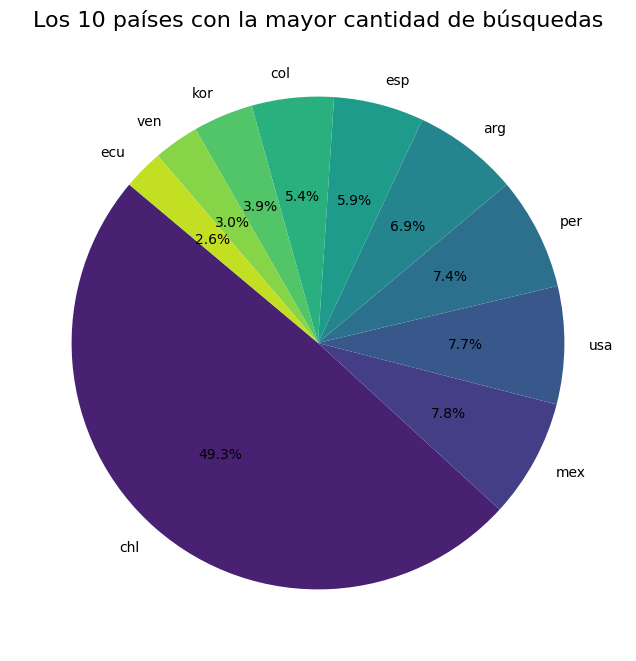

In [21]:
# Filtrar los 10 países con más búsquedas
top_10_paises = df_without_nulls['country'].value_counts().head(10)

# Crear gráfico circular
plt.figure(figsize=(8,8))
plt.pie(top_10_paises, labels=top_10_paises.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_10_paises)))

# Título
plt.title('Los 10 países con la mayor cantidad de búsquedas', fontsize=16)

# Mostrar gráfico
plt.show()

- Chile es el país con la mayor cantidad de búsquedas, representando el 49.3% del total.
- México, Estados Unidos, Perú y Argentina también representan una porción significativa de las búsquedas, aunque mucho menor que Chile, con porcentajes que oscilan entre el 6.9% y el 7.8%.
- Países como Corea del Sur, Colombia, Venezuela y Ecuador tienen una cantidad mucho menor de búsquedas (por debajo del 6%)

### RECOMENDACIONES
- Dado que Chile concentra la mayor parte de las búsquedas, es fundamental continuar fortaleciendo el contenido enfocado en las necesidades locales.
- Se podrían lanzar campañas específicas o contenido orientado a los intereses de los usuarios en Chile para mantener y aumentar esta cuota.
- México, Estados Unidos, Perú y Argentina muestran un buen rendimiento, pero todavía hay espacio para crecimiento. Para estos países, sería recomendable crear contenido localizado que aborde problemáticas o tendencias específicas de cada región, aumentar la inversión en marketing digital dirigido a estos países y considerar asociaciones locales con instituciones de salud mental u otros para mejorar la visibilidad en estos mercados.
- En países como Corea del Sur, Colombia, Venezuela y Ecuador, podría haber oportunidades para aumentar las búsquedas mediante estrategias como localización del contenido al idioma o términos de búsqueda relevantes en estos países, realizar campañas de SEO enfocadas a estos mercados emergentes e iniciar campañas en redes sociales o publicidad digital en esas regiones.
- Realizar estudios adicionales para entender mejor el comportamiento de los usuarios de países además de Chile y evaluar por qué no están buscando más contenido relacionado.
- Ofrecer contenido más específico o interactivo para captar la atención en mercados menos activos.

## ¿Cuáles son los términos de búsqueda más populares?

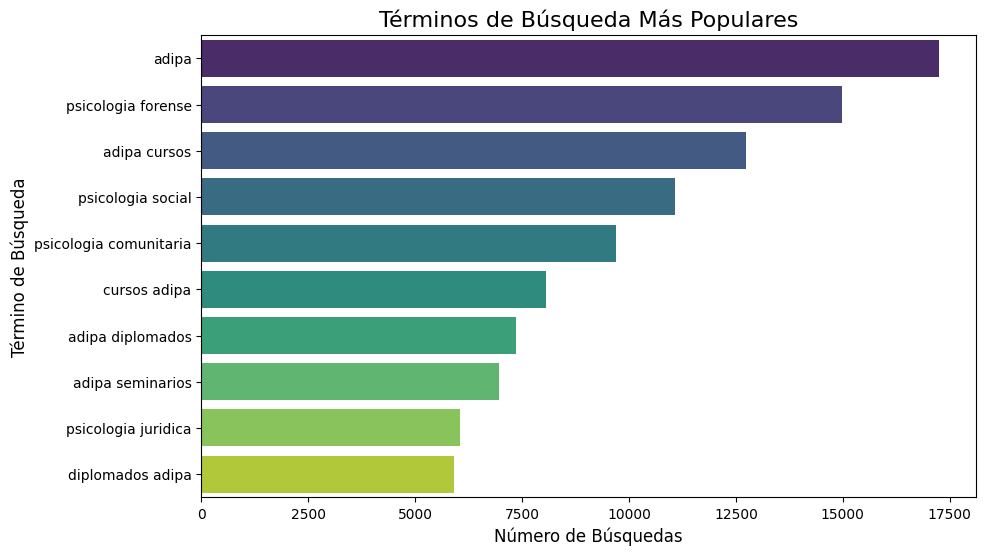

In [22]:
# Contar los términos de búsqueda más populares
top_10_terminos = df_without_nulls['query'].value_counts().head(10)

# Crear gráfico de barras
plt.figure(figsize=(10,6))
sns.barplot(x=top_10_terminos.values, y=top_10_terminos.index, palette="viridis")

# Títulos y etiquetas
plt.title('Términos de Búsqueda Más Populares', fontsize=16)
plt.xlabel('Número de Búsquedas', fontsize=12)
plt.ylabel('Término de Búsqueda', fontsize=12)

# Mostrar gráfico
plt.show()

## ¿Cómo varía el rendimiento de las búsquedas (impresiones, clics, CTR) según el tipo de dispositivo utilizado?

In [23]:
# Agrupar por dispositivo y calcular la media de impresiones, clics y CTR
rendimiento_por_dispositivo = df_without_nulls.groupby('device').agg({
    'impressions': 'mean',
    'clicks': 'mean',
    'ctr': 'mean'
}).reset_index()

# Mostrar los resultados
print(rendimiento_por_dispositivo)

    device  impressions    clicks       ctr
0  DESKTOP     1.809857  0.049951  0.018839
1   MOBILE     2.638463  0.059653  0.022975
2   TABLET     1.647995  0.058846  0.024902


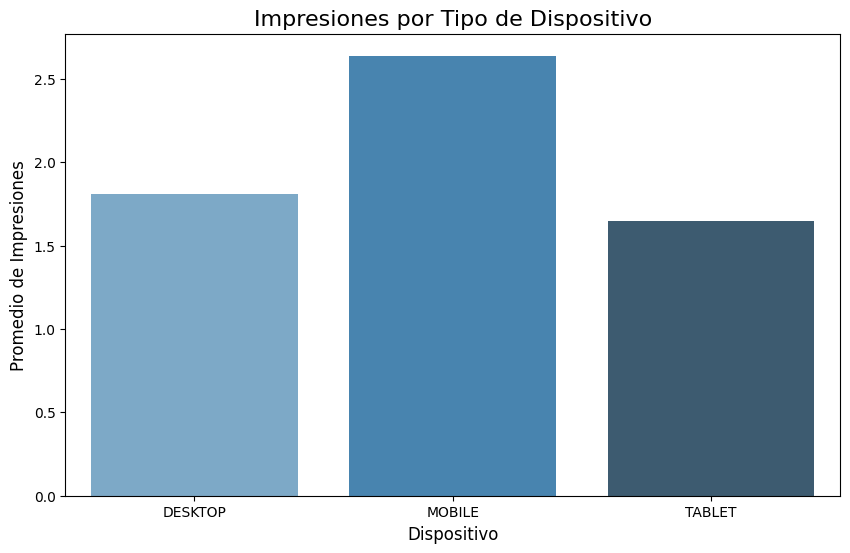

In [24]:
# Gráfico de impresiones por dispositivo
plt.figure(figsize=(10,6))
sns.barplot(x='device', y='impressions', data=rendimiento_por_dispositivo, palette="Blues_d")

# Títulos y etiquetas
plt.title('Impresiones por Tipo de Dispositivo', fontsize=16)
plt.xlabel('Dispositivo', fontsize=12)
plt.ylabel('Promedio de Impresiones', fontsize=12)

# Mostrar gráfico
plt.show()

El contenido se muestra más frecuentemente en dispositivos móviles. Esto muestra que la mayor cantidad de impresiones provienen de usuarios de móviles, lo cual es común en muchos sitios web hoy en día.

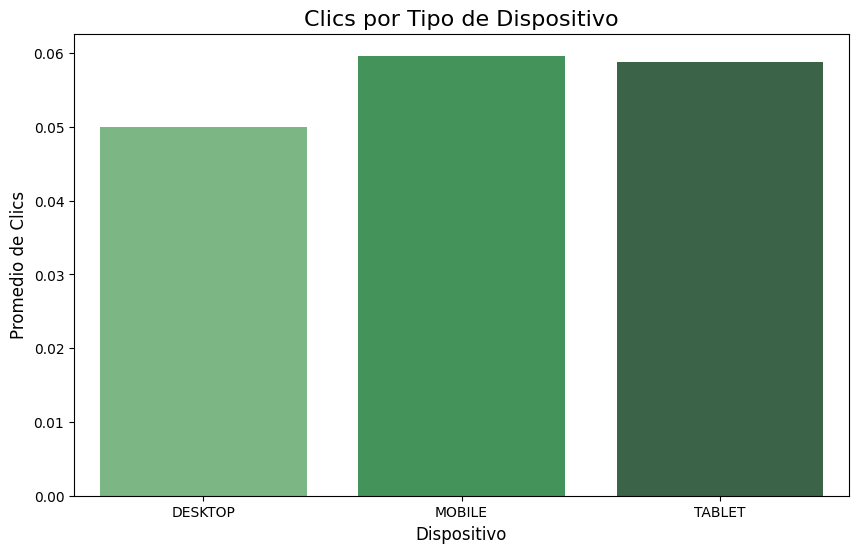

In [25]:
# Gráfico de clics por dispositivo
plt.figure(figsize=(10,6))
sns.barplot(x='device', y='clicks', data=rendimiento_por_dispositivo, palette="Greens_d")

# Títulos y etiquetas
plt.title('Clics por Tipo de Dispositivo', fontsize=16)
plt.xlabel('Dispositivo', fontsize=12)
plt.ylabel('Promedio de Clics', fontsize=12)

# Mostrar gráfico
plt.show()

A pesar de que las impresiones en dispositivos móviles son las más altas, los clics no son mucho mayores en comparación con los PC y notebooks y tablets.

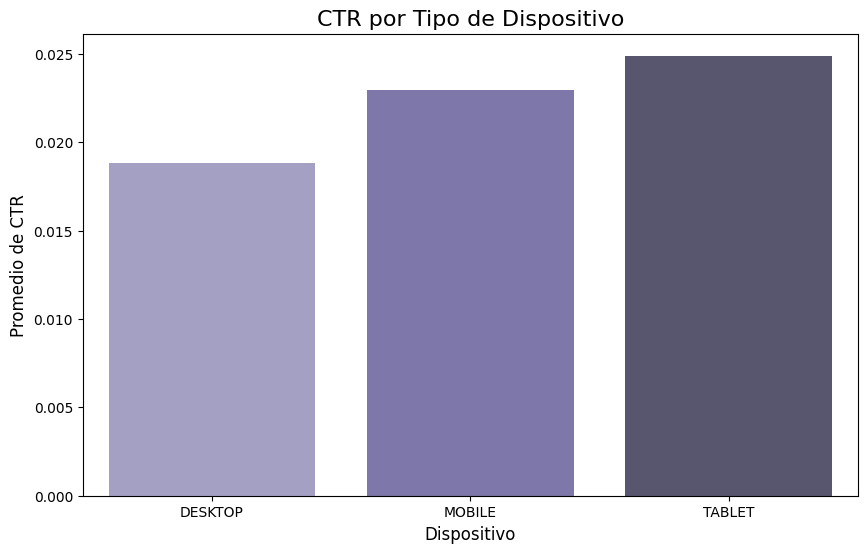

In [26]:
# Gráfico de CTR por dispositivo
plt.figure(figsize=(10,6))
sns.barplot(x='device', y='ctr', data=rendimiento_por_dispositivo, palette="Purples_d")

# Títulos y etiquetas
plt.title('CTR por Tipo de Dispositivo', fontsize=16)
plt.xlabel('Dispositivo', fontsize=12)
plt.ylabel('Promedio de CTR', fontsize=12)

# Mostrar gráfico
plt.show()

Aunque los dispositivos móviles tienen más impresiones, las tablets tienen un CTR algo más alto, lo que significa que son más eficientes en convertir impresiones en clics. El CTR en dispositivos de escritorio es el más bajo.

### RECOMENDACIONES

- Dado que las impresiones en móviles son mayores, es importante asegurarse de que el contenido y la experiencia de usuario estén completamente optimizados para móviles, ya que hay una diferencia entre impresiones y clics que podría mejorarse.
- El CTR más alto en tablets puede señalar que los usuarios de tablets están obteniendo una mejor experiencia y/o que los anuncios están mejor posicionados para este tipo de dispositivo. Esto podría servir como modelo para mejorar en otros como dispositivos de escritorio o móviles.
- Es importante revisar el rendimiento de las páginas en dispositivos de escritorio, ya que aunque las impresiones son altas, el CTR es el más bajo. Se deberían realizar pruebas de experiencia de usuario junto a encuestas para mejorar la tasa de clics en estos dispositivos.

## ¿Existe alguna relación entre la posición promedio de una página en los resultados de búsqueda y su tasa de clics (CTR)?

In [27]:
# Calcular la correlación entre la posición promedio y el CTR
correlacion = df_without_nulls[['avg_position', 'ctr']].corr()

# Mostrar el valor de correlación
print(correlacion)

              avg_position       ctr
avg_position      1.000000 -0.087166
ctr              -0.087166  1.000000


In [28]:
# Filtrar las 10 primeras posiciones con más CTR (no cero)
top_10_posiciones = df_without_nulls[df_without_nulls['ctr'] > 0].sort_values('avg_position').head(10)

# Mostrar las primeras 10 posiciones con CTR > 0
print(top_10_posiciones)

              date                  url                query country  \
1802524 2024-04-11  https://adipa.cl...  wisc v interpret...     esp   
845766  2024-05-15  https://adipa.cl...    metodo denver tea     esp   
2310    2024-04-22    https://adipa.cl/               addipa     chl   
2271    2024-03-15  https://adipa.cl...  cuanto gana un p...     chl   
2124    2024-04-15  https://adipa.cl...  evaluacion cogni...     slv   
1967    2024-05-19  https://adipa.cl...     metodo floortime     ecu   
1956    2024-05-19  https://adipa.cl...  test del hombre ...     chl   
1775    2024-04-11  https://adipa.cl...  entrevista psico...     col   
883     2024-03-27  https://adipa.cl...     adipa seminarios     chl   
831     2024-03-13  https://adipa.cl...  cursos de sicologia     chl   

        search_type   device  is_tpf_faq  impressions  clicks       ctr  \
1802524         WEB   MOBILE       False            1       1  1.000000   
845766          WEB   MOBILE       False            1    

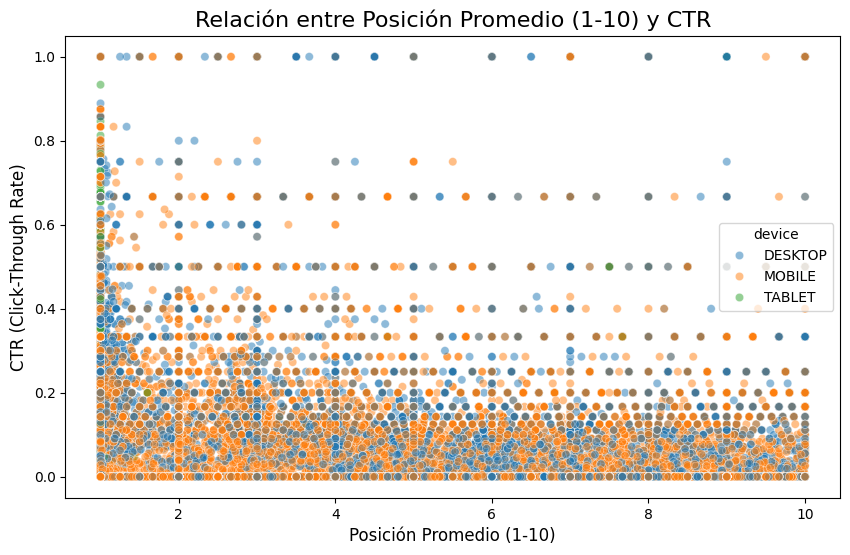

In [29]:
# Filtrar el DataFrame para posiciones entre 1 y 10
df_rango_1_10 = df_without_nulls[(df_without_nulls['avg_position'] >= 1) & (df_without_nulls['avg_position'] <= 10)]

# Crear gráfico de dispersión para posiciones entre 1 y 10
plt.figure(figsize=(10,6))
sns.scatterplot(x='avg_position', y='ctr', data=df_rango_1_10, hue='device', alpha=0.5)

# Títulos y etiquetas
plt.title('Relación entre Posición Promedio (1-10) y CTR', fontsize=16)
plt.xlabel('Posición Promedio (1-10)', fontsize=12)
plt.ylabel('CTR (Click-Through Rate)', fontsize=12)

# Mostrar gráfico
plt.show()

- Como era de esperar, la primera posición en los resultados de búsqueda tiene una gran ventaja en términos de CTR.
- El CTR disminuye significativamente a partir de la posición 2, lo que resalta la importancia de aparecer en los primeros resultados de búsqueda.

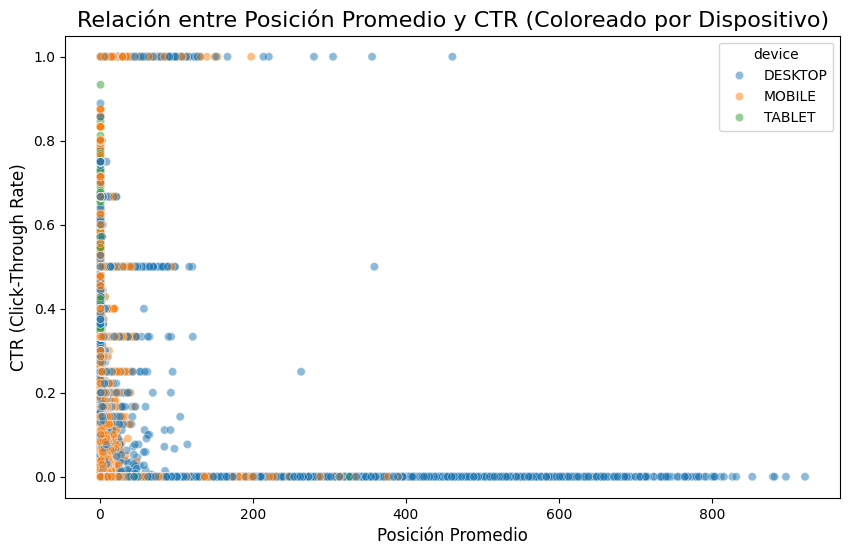

In [30]:
# Crear gráfico de dispersión con color por dispositivo para segmentar
plt.figure(figsize=(10,6))
sns.scatterplot(x='avg_position', y='ctr', data=df_without_nulls, hue='device', alpha=0.5)

# Títulos y etiquetas
plt.title('Relación entre Posición Promedio y CTR (Coloreado por Dispositivo)', fontsize=16)
plt.xlabel('Posición Promedio', fontsize=12)
plt.ylabel('CTR (Click-Through Rate)', fontsize=12)

# Mostrar gráfico
plt.show()

- El patrón general es bastante similar para todos los dispositivos: las primeras posiciones tienden a tener CTR más altos.
- A medida que la posición de la página empeora, el CTR tiende a disminuir, lo que es una tendencia lógica en la mayoría de los casos de búsqueda en línea. Existen algunos puntos con CTR alto en posiciones bajas que merecen más investigación.

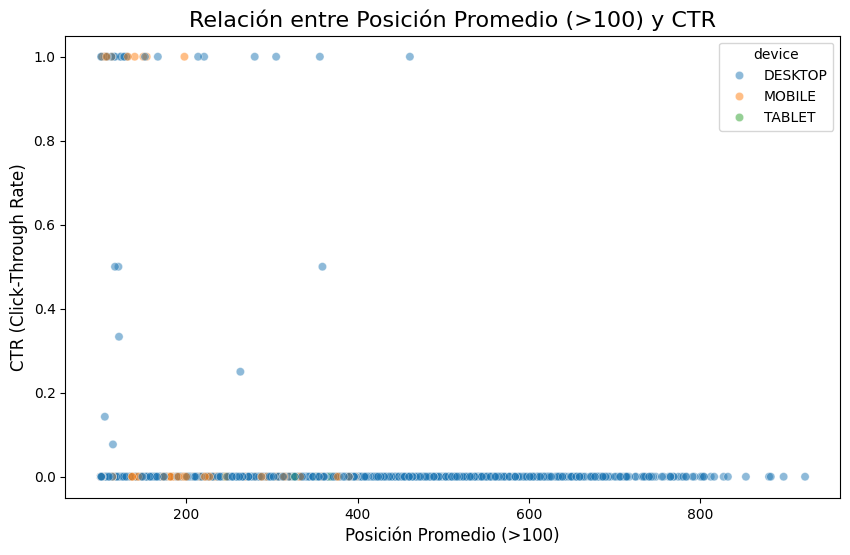

In [31]:
# Filtrar el DataFrame para posiciones mayores a 100
df_ultimas_posiciones = df_without_nulls[df_without_nulls['avg_position'] > 100]

# Crear gráfico de dispersión para las últimas posiciones (posiciones > 100)
plt.figure(figsize=(10,6))
sns.scatterplot(x='avg_position', y='ctr', data=df_ultimas_posiciones, hue='device', alpha=0.5)

# Títulos y etiquetas
plt.title('Relación entre Posición Promedio (>100) y CTR', fontsize=16)
plt.xlabel('Posición Promedio (>100)', fontsize=12)
plt.ylabel('CTR (Click-Through Rate)', fontsize=12)

# Mostrar gráfico
plt.show()

- Es posible que las páginas con CTR alto en posiciones alejadas estén cubriendo consultas de búsqueda muy específicas o nichos, donde los usuarios están más dispuestos a explorar resultados en posiciones alejadas.
- En algunas búsquedas con pocas alternativas, incluso las páginas en posiciones muy bajas podrían captar clics porque no hay muchas otras opciones disponibles para el usuario.

In [32]:
# Filtrar outliers con posiciones mayores a 100 y CTR mayor a 0.5
outliers_ultimas_posiciones = df_ultimas_posiciones[df_ultimas_posiciones['ctr'] > 0.5]
print(outliers_ultimas_posiciones)

              date                  url                query country  \
2149    2024-04-29  https://adipa.cl...  tipos de narcisi...     chl   
123282  2024-04-10  https://adipa.cl...       test de figura     ven   
153470  2024-05-15  https://adipa.cl...  maltrato infanti...     chl   
221469  2024-05-14  https://adipa.cl...         doctor chile     chl   
302748  2024-04-08  https://adipa.cl...      psicologo chile     chl   
385855  2024-03-19  https://adipa.cl...  contexto educati...     esp   
397626  2024-05-13  https://adipa.cl...  convivencia esco...     per   
440656  2024-05-25  https://adipa.cl...  habilidades adap...     mex   
459059  2024-04-03    https://adipa.cl/        cursos online     chl   
533789  2024-05-09  https://adipa.cl...  depresion post p...     col   
553547  2024-05-07  https://adipa.cl...  salud mental online     chl   
582310  2024-04-30  https://adipa.cl...  imagenes de bull...     cri   
691844  2024-03-20  https://adipa.cl...  peritaje en trab...    

- Estas páginas no han sido vistas por muchos usuarios. Cada una de ellas ha recibido solo una impresión, lo que significa que solo un usuario llegó a verlas en los resultados de búsqueda.
- Que el CTR sea 1.0 en estos casos sugiere que aunque la página fue vista solo por un usuario, fue lo suficientemente relevante o atractiva como para que ese usuario clickeara.
- Es posible que el contenido esté alineado perfectamente con lo que el usuario buscaba, lo que explica por qué ese único usuario decidió hacer clic.

El CTR de 1.0 en estos casos no implica necesariamente que estas páginas sean extraordinarias o que siempre generen clics. Lo que revela que cada página tuvo la suerte de ser vista por una única persona que encontró el contenido relevante y decidió hacer clic. Esto es un patrón interesante pero probablemente no sostenible a gran escala si estas páginas fueran vistas por más usuarios.

### RECOMENDACIONES

- Dado que el CTR es mayor en las primeras posiciones, es fundamental seguir invirtiendo en técnicas de optimización SEO para mejorar la posición promedio de las páginas que están clasificadas más allá del top 10. Esto incluye mejorar el contenido, optimizar las palabras claves y aumentar la velocidad de carga de las páginas.

- Algunas páginas con posiciones más alejadas aún logran CTR altos. Estas páginas podrían estar ofreciendo contenido muy relevante para búsquedas de nicho. Sería recomendable investigar más a fondo estas páginas para ver si su contenido puede ser optimizado aún más o si hay estrategias para hacer que esas páginas suban en el ranking para obtener más impresiones y clics.

- Continuar monitoreando el CTR en función de la posición promedio puede ayudar a identificar rápidamente las páginas que, a pesar de estar en una posición baja, aún generan tráfico. Estas pueden ser oportunidades de mejora para SEO o para campañas publicitarias.

- La segmentación de los gráficos por tipo de dispositivo muestra que el CTR no varía demasiado entre escritorio, móvil y tablet, pero es importante considerar que ciertos tipos de contenido pueden rendir mejor en algunos dispositivos. Revisar cómo se visualizan las páginas en diferentes dispositivos puede mejorar la experiencia del usuario y, por lo tanto, aumentar el CTR.

## ¿Cuáles son las áreas o secciones del sitio web que reciben la mayor cantidad de búsquedas?

         paginas_areas  impressions
4  Recursos informa...      3226954
3  Programas transa...       982999
2                Otras       622388
5           Seminarios       291086
0             Docentes       110495
1             Escuelas        44299


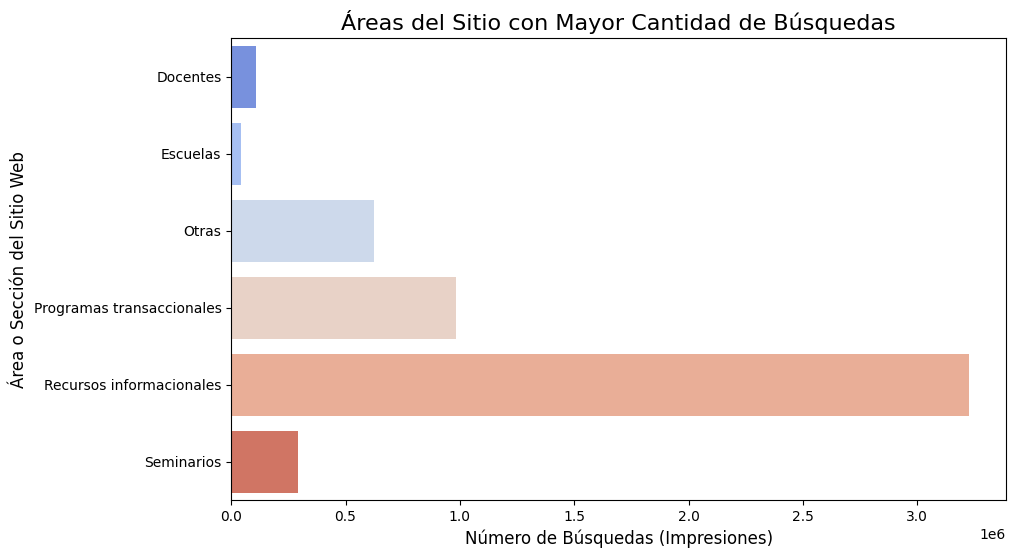

In [33]:
# Agrupar por 'paginas_areas' y sumar las impresiones
busquedas_por_area = df_without_nulls.groupby('paginas_areas')['impressions'].sum().reset_index()

# Ordenar por la cantidad de búsquedas (impresiones)
busquedas_por_area = busquedas_por_area.sort_values(by='impressions', ascending=False)

# Mostrar las primeras áreas con más búsquedas
print(busquedas_por_area.head(10))

# Visualizar las áreas con más búsquedas (primeras 10)
plt.figure(figsize=(10,6))
sns.barplot(x='impressions', y='paginas_areas', data=busquedas_por_area.head(10), palette='coolwarm')

# Títulos y etiquetas
plt.title('Áreas del Sitio con Mayor Cantidad de Búsquedas', fontsize=16)
plt.xlabel('Número de Búsquedas (Impresiones)', fontsize=12)
plt.ylabel('Área o Sección del Sitio Web', fontsize=12)

# Mostrar gráfico
plt.show()

- Recursos informacionales y programas transaccionales son las áreas clave del sitio web en términos de búsquedas e impresiones. Estas son probablemente las áreas más relevantes para los usuarios y podrían beneficiarse de mejoras en contenido o navegación para maximizar su utilidad.
- Las otras áreas como seminarios o docentes aunque son menos populares siguen teniendo su importancia y podrían ser optimizadas dependiendo de los objetivos del sitio.

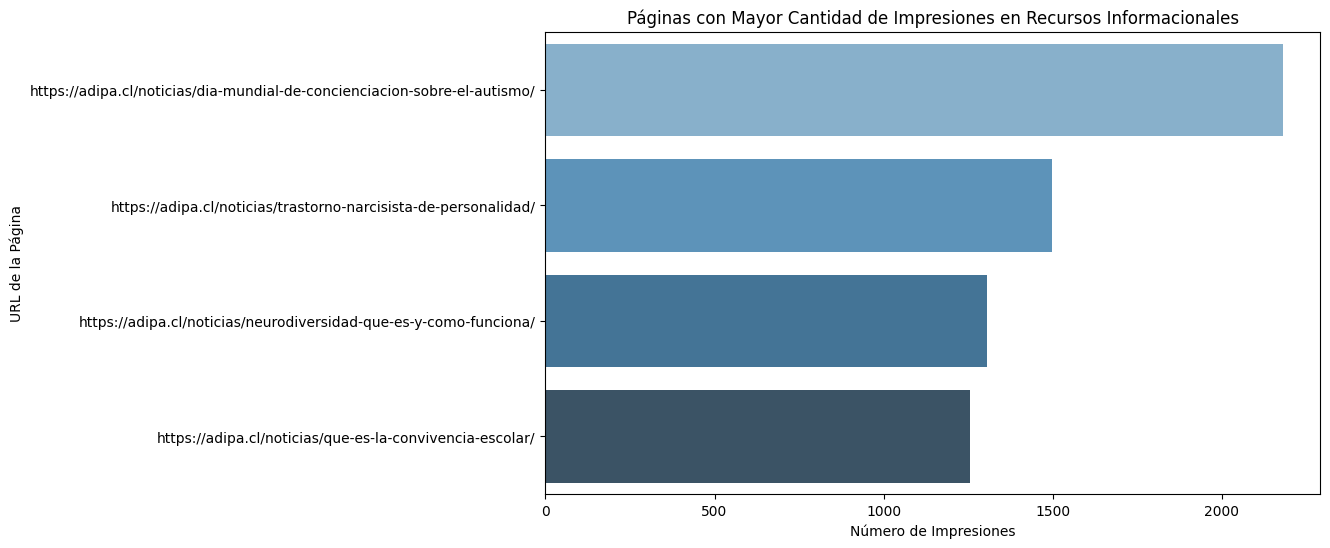

In [34]:
# Filtrar y obtener las páginas de 'Recursos informacionales'
recurso_info_mayor = df_without_nulls[df_without_nulls['paginas_areas'] == 'Recursos informacionales'].sort_values(by='impressions', ascending=False).head(10)

# Graficar las páginas con mayores impresiones en 'Recursos informacionales'
plt.figure(figsize=(10,6))
sns.barplot(x='impressions', y='url', data=recurso_info_mayor, palette='Blues_d', ci=None)
plt.title('Páginas con Mayor Cantidad de Impresiones en Recursos Informacionales')
plt.xlabel('Número de Impresiones')
plt.ylabel('URL de la Página')
plt.show()


La página con mayor cantidad de impresiones es sobre el Día Mundial de Concienciación sobre el Autismo, lo cual sugiere que este es un tema altamente relevante para los usuarios que buscan información en esta área. Le siguen otras páginas sobre temas como el trastorno narcisista de la personalidad y neurodiversidad, lo que resalta la importancia de temas psicológicos y de salud mental en esta sección.

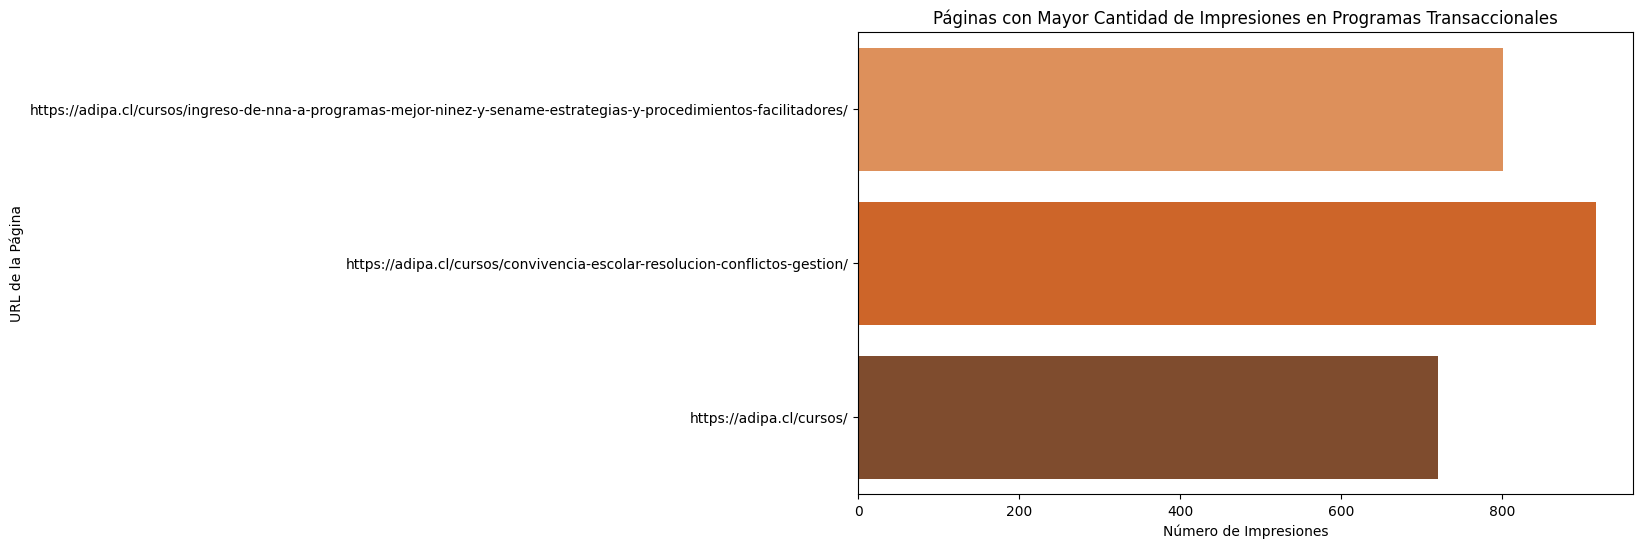

In [35]:
# Filtrar y obtener las páginas de 'Programas transaccionales'
programa_trans_mayor = df_without_nulls[df_without_nulls['paginas_areas'] == 'Programas transaccionales'].sort_values(by='impressions', ascending=False).head(10)

# Graficar las páginas con mayores impresiones en 'Programas transaccionales'
plt.figure(figsize=(10,6))
sns.barplot(x='impressions', y='url', data=programa_trans_mayor, palette='Oranges_d', ci=None)
plt.title('Páginas con Mayor Cantidad de Impresiones en Programas Transaccionales')
plt.xlabel('Número de Impresiones')
plt.ylabel('URL de la Página')
plt.show()

La página con más impresiones está relacionada con programas de ingreso de niños y niñas a Mejor Niñez y SENAME, lo que indica un gran interés en temas relacionados con programas sociales y protección infantil.
También hay interés en convivencia escolar y resolución de conflictos, lo que muestra que este tema tiene relevancia dentro de la sección de programas transaccionales.

### Recomendaciones generales
- Mantener el enfoque en temas relevantes como el Día Mundial de Concienciación sobre el Autismo, neurodiversidad, y trastornos psicológicos. Estos temas parecen resonar con los usuarios y están recibiendo muchas impresiones.
- Estas páginas deben estar optimizadas en términos de SEO, utilizando palabras clave relevantes y mejorando la estructura de los contenidos.
- Aunque la salud mental es un tema importante agregar contenido adicional relacionado con el bienestar general, la psicología infantil y educación emocional podría atraer a un público más diverso.
- Las páginas que tratan temas sociales, como el ingreso de niños a programas de protección social, generan más impresiones que otras en el área de programas transaccionales. Una campaña de marketing dirigida a estas áreas puede atraer más tráfico.
- El contenido relacionado con la convivencia escolar y la resolución de conflictos parece tener interés en los programas transaccionales. Ampliar el contenido y promoverlo activamente podría aumentar las impresiones.
- Es posible agregar recursos descargables, videos explicativos o webinars en esta sección, lo que podría atraer a más usuarios interesados en educación y programas sociales.
- Las áreas como docentes y seminarios reciben pocas impresiones. Mejorar su visibilidad en el sitio web mediante enlaces directos desde la página principal o promoviendo contenido relacionado en blogs, correos electrónicos, o incluso en redes sociales, podría hacer que estas aumenten las impresiones.
- Hacer colaboraciones estratégicas para aumentar las impresiones de los programas como Docentes, Seminarios y escuelas.

## ¿Hay alguna diferencia en el rendimiento de las búsquedas entre las preguntas frecuentes y las búsquedas normales?

In [36]:
# Revisar cuántos valores True y False hay en la columna 'is_tpf_faq'
faq_counts = df_without_nulls['is_tpf_faq'].value_counts()
print(faq_counts)

is_tpf_faq
False    2388408
Name: count, dtype: int64


En este caso no es posible ver si hay alguna diferencia en el rendimiento de las búsquedas entre las preguntas frecuentes y las búsquedas normales porque no hay ninguna categorizada como pregunta frecuente (En este caso todos los datos con la columna is_tpf_faq son falsos, es decir que no son pregunta frecuente).

### RECOMENDACIONES

- Se debe revisar y asegurar que las búsquedas que corresponden a preguntas frecuentes estén correctamente etiquetadas en el sistema de origen.
- Los datos en la columna `is_tpf_faq` deberían reflejar correctamente si una búsqueda corresponde o no a una pregunta frecuente. Si este etiquetado no está implementado, es necesario incorporarlo en el proceso de captura de datos.
- Antes de proceder con el análisis, se debe implementar una verificación automática para validar si la columna `is_tpf_faq` contiene valores `True`. Si no es así, alertar al equipo de datos sobre la ausencia de información relevante.
- Es posible que las búsquedas que deberían estar marcadas como preguntas frecuentes no se estén etiquetando correctamente. Se recomienda revisar los criterios para determinar qué consultas son consideradas como `FAQ` y asegurarse de que se estén aplicando correctamente durante el proceso de registro de datos.
- Si en algún momento se identifican búsquedas que deberían estar etiquetadas como preguntas frecuentes, solicitar la inclusión de estos datos en el futuro para realizar un análisis más preciso.

# RESPUESTAS FINALES
Si bien las respuestas se encuentran en cada pregunta, se hará un resumen más directo para cada una. Respecto a las recomendaciones e insights, estos se encuentran en el desarrollo de cada pregunta.

## 1. ¿Cuáles son los países desde donde se realizan la mayor cantidad de búsquedas?
- Los 10 países dónde se realizan la mayor cantidad de búsquedas son ordenadas de mayor a menor: Chile, México, Estados Unidos, Perú, Argentina, España, Colombia, Corea del sur, Venezuela y Ecuador

## 2. ¿Cuáles son los términos de búsqueda más populares?
- Los 10 términos de búsqueda más populares son ordenadas de mayor a menor: Adipa, Psicología Forense, Adipa Cursos, Psicología Social, Psicología Comunitaria,
Cursos Adipa, Adipa diplomados, Adipa seminarios, Psicología Juridica y Diplomados Adipa.

## 3. ¿Cómo varía el rendimiento de las búsquedas (impresiones, clics, CTR) según el tipo de dispositivo utilizado?
- Los móviles destacan por su volumen en impresiones y clics, lo que sugiere que es el dispositivo predominante para las búsquedas. Sin embargo, las tablet tienen un mejor rendimiento en términos de CTR, lo que sugiere que las búsquedas en estos dispositivos pueden estar más dirigidas a resultados específicos o que los usuarios están más comprometidos. Finalmente, el escritorio, aunque muestra una menor cantidad de clics e impresiones, sigue siendo una plataforma clave que podría beneficiarse de optimizaciones adicionales para mejorar su CTR.

## 4. ¿Existe alguna relación entre la posición promedio de una página en los resultados de búsqueda y su tasa de clics (CTR)?
- Entre más alta la posición promedio, más alto es el CTR, por lo que quiere decir que la relación entre ambas columnas es directa, es decir que las primeras posiciones suelen obtener más clicks. Sin embargo, existen excepciones en las que algunas páginas en posiciones bajas aún logran un CTR relativamente alto. Esto podría deberse a factores como búsquedas muy específicas o de nicho, donde aunque haya pocas impresiones, los usuarios están más inclinados a hacer clic, etc. Estos casos suelen ocurrir cuando solo un usuario realizó la búsqueda (una sola impresión) y también hizo clic en el enlace, lo que resulta en un CTR del 100%.

## 5. ¿Cuáles son las áreas o secciones del sitio web que reciben la mayor cantidad de búsquedas?
- Las áreas de Recursos informacionales y programas transaccionales son las áreas del sitio web que reciben la mayor cantidad de búsquedas, teniendo más de 3 millones de búsquedas y 1 millón respectivamente.

## 6. ¿Hay alguna diferencia en el rendimiento de las búsquedas entre las preguntas frecuentes y las búsquedas normales?
- En este caso no es posible ver si hay alguna diferencia en el rendimiento de las búsquedas entre las preguntas frecuentes y las búsquedas normales porque no hay ninguna categorizada como pregunta frecuente (En este caso todos los datos con la columna is_tpf_faq son falsos, es decir que no son pregunta frecuente).